In [1]:
%run model_01.ipynb

Flux Scanning based on Enforced Objective Flux (FSEOF), is an algorithm that identifies fluxes within the metabolic network that rise when product formation is mandated. It incorporates these fluxes as an extra constraint and ultimately suggests a set of reactions requiring overexpression of the involved genes. FSEOF is performed in the WS_DGAT reaction, to identify if any knockouts can be prformed to improve the yield of biodiesel.

In [2]:
from cameo import models
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
import numpy as np

In [6]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF

In [7]:
fseof = FSEOF(model)

In [8]:
result = fseof.run(target=model.reactions.WS_DGAT)

In [9]:
df = result.data_frame

In [11]:
df

,1,2,3,4,5,6,7,8,9,10
ACALD,-0.094710,-0.189420,-0.284131,-0.378841,-0.473551,-0.568261,-0.662972,-0.757682,-0.852392,-0.947102
PPA,3.268403,3.465945,3.663487,3.861029,4.058571,4.256113,4.453655,4.651197,4.848739,5.046281
PPM,-0.839680,-0.860820,-0.881959,-0.903099,-0.924239,-0.945379,-0.966519,-0.987658,-1.008798,-1.029938
ASPTA,-2.621039,-2.674385,-2.727732,-2.781078,-2.834424,-2.887771,-2.941117,-2.994463,-3.047809,-3.101156
DHORD5,0.264032,0.237957,0.211882,0.185807,0.159732,0.133658,0.107583,0.081508,0.055433,0.029359
...,...,...,...,...,...,...,...,...,...,...
PYK2,2.247945,2.243023,2.238102,2.233181,2.228259,2.223338,2.218416,2.213495,2.208573,2.203652
PYK6,0.020885,0.018822,0.016760,0.014697,0.012635,0.010572,0.008510,0.006447,0.004385,0.002322
PIt2rpp,1.054053,1.262149,1.470245,1.678341,1.886437,2.094533,2.302629,2.510725,2.718821,2.926917
I2FE2SR,0.000002,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000000,0.000000,0.000000


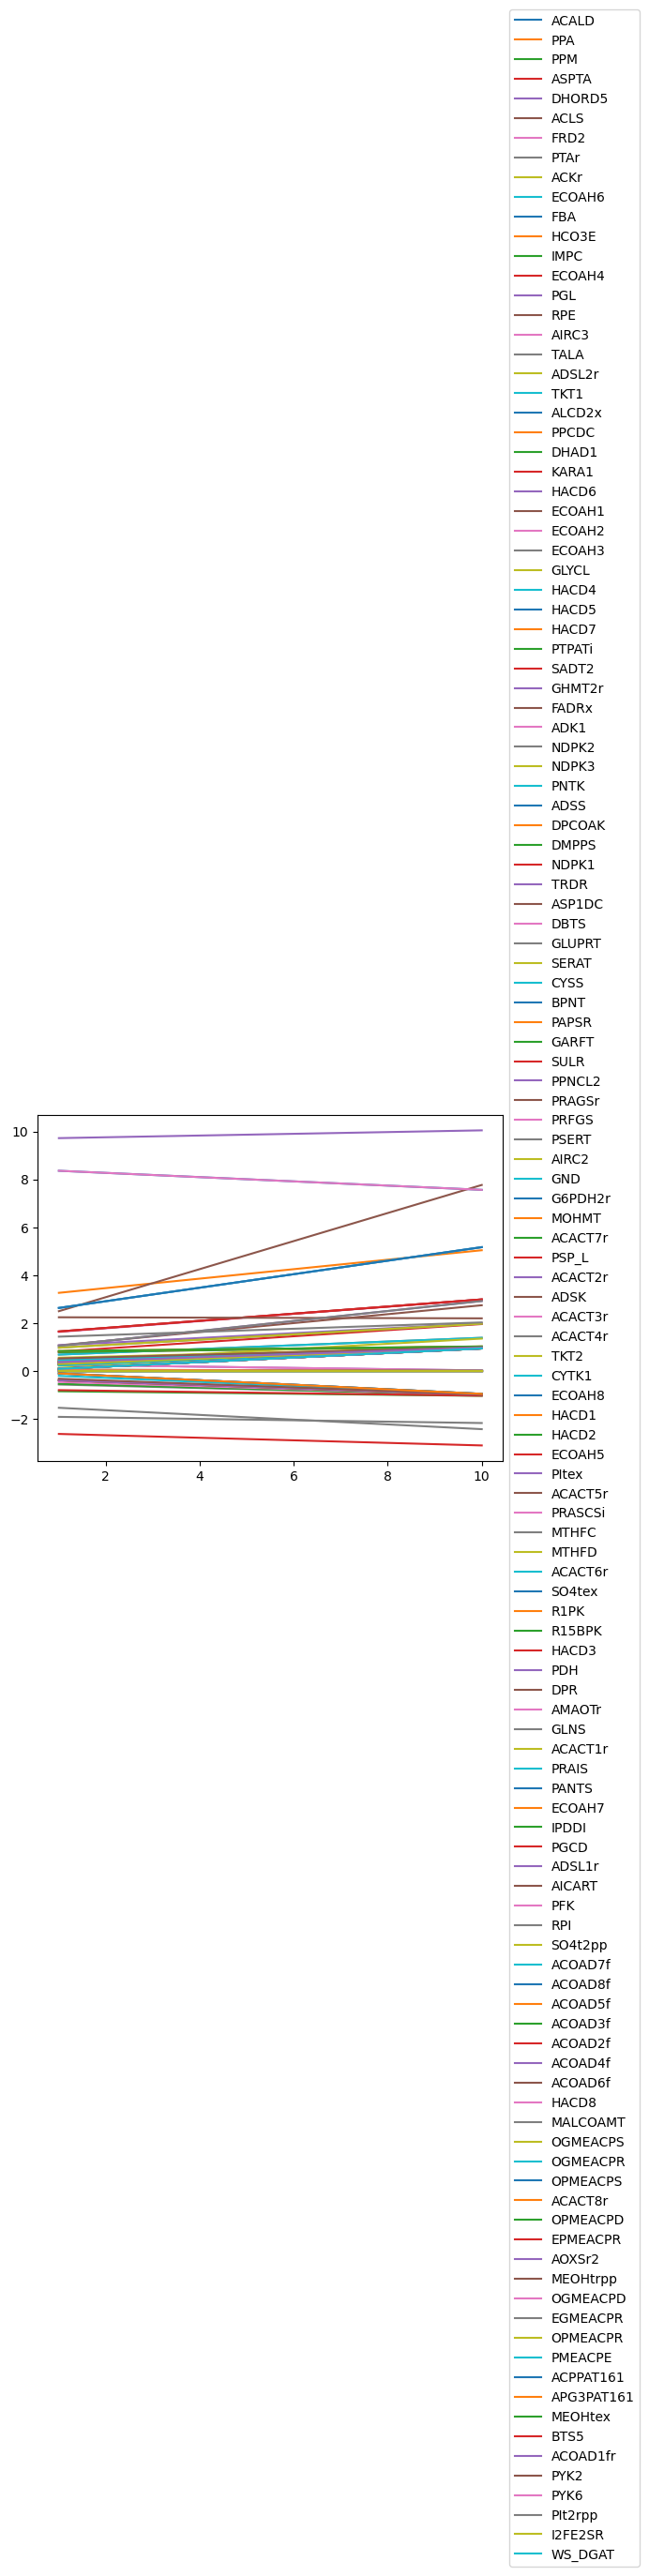

In [12]:
from matplotlib import pyplot as plt
result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The output reactions from the FSEOF analysis are the genes/reactions that can be over or down regulated through the metabolic pathway for the production of biodiesel.

In [29]:
# sorting the dataframe
df= df.sort_values([1], ascending = False)
 
from pytest import approx
# removing genes from dataframe 
removed_zero = (df != approx(0.0)).all(axis=1)
df = df.loc[removed_zero]
df.head()

,1,2,3,4,5,6,7,8,9,10
PDH,9.725724,9.761760,9.797797,9.833834,9.869871,9.905908,9.941945,9.977982,10.014018,10.050055
FBA,8.363236,8.274709,8.186181,8.097653,8.009126,7.920598,7.832071,7.743543,7.655015,7.566488
PFK,8.363236,8.274709,8.186181,8.097653,8.009126,7.920598,7.832071,7.743543,7.655015,7.566488
PPA,3.268403,3.465945,3.663487,3.861029,4.058571,4.256113,4.453655,4.651197,4.848739,5.046281
PGL,2.637295,2.919223,3.201152,3.483081,3.765009,4.046938,4.328866,4.610795,4.892724,5.174652


Text(0.5, 1.0, 'Flux scanning based on Enforced Objective Flux')

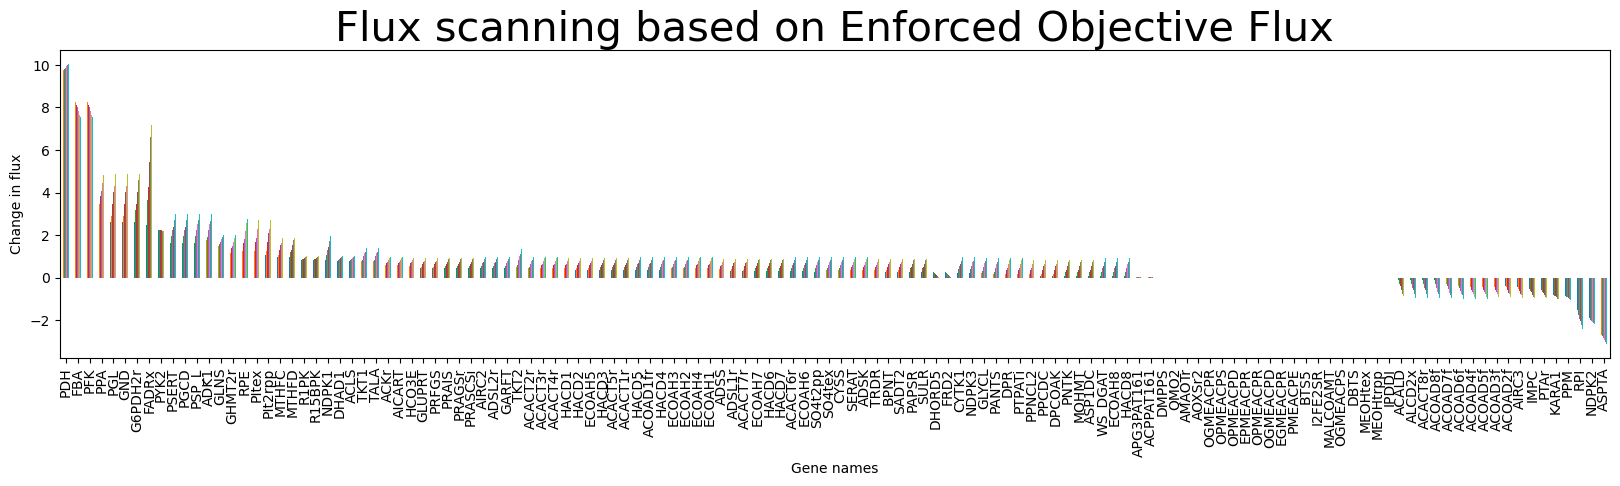

In [31]:
def bar_color(df,color1,color2):
    return np.where(df.values >=0,color1,color2).T

fig = df.plot(legend=None, kind='bar',figsize=(20, 4), grid =False);
fig.set_ylabel('Change in flux')
fig.set_xlabel('Gene names')
fig.set_title('Flux scanning based on Enforced Objective Flux', size=30)

In [32]:
df['relative_change_in_flux'] = (df[10]-df[1])/df[10] +1


In [33]:
target_reactions_df = df[df['relative_change_in_flux'] > 1.8]

In [35]:
target_reactions_df

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
GLYCL,0.137978,0.228415,0.318853,0.409290,0.499727,0.590164,0.680602,0.771039,0.861476,0.951913,1.855052
PANTS,0.095248,0.189905,0.284562,0.379220,0.473877,0.568534,0.663191,0.757848,0.852505,0.947162,1.899439
DPR,0.095248,0.189905,0.284562,0.379220,0.473877,0.568534,0.663191,0.757848,0.852505,0.947162,1.899439
PTPATi,0.095248,0.189905,0.284562,0.379220,0.473877,0.568534,0.663191,0.757848,0.852505,0.947162,1.899439
PPNCL2,0.095248,0.189905,0.284562,0.379220,0.473877,0.568534,0.663191,0.757848,0.852505,0.947162,1.899439
PPCDC,0.095248,0.189905,0.284562,0.379220,0.473877,0.568534,0.663191,0.757848,0.852505,0.947162,1.899439
DPCOAK,0.095248,0.189905,0.284562,0.379220,0.473877,0.568534,0.663191,0.757848,0.852505,0.947162,1.899439
PNTK,0.095248,0.189905,0.284562,0.379220,0.473877,0.568534,0.663191,0.757848,0.852505,0.947162,1.899439
MOHMT,0.095248,0.189905,0.284562,0.379220,0.473877,0.568534,0.663191,0.757848,0.852505,0.947162,1.899439
ASP1DC,0.095248,0.189905,0.284562,0.379220,0.473877,0.568534,0.663191,0.757848,0.852505,0.947162,1.899439


The representation of the relative change for the different fluxes, can be shown by the calculation: R = (B-A) / B +1

In [36]:
df = target_reactions_df.drop(labels='relative_change_in_flux', axis=1)

A higher relative_change_in_flux of 80% and above will identify target reactions which an up-down regulations can be performed.

Text(0.5, 1.0, 'Reactions with a relative change in Flux > 80%')

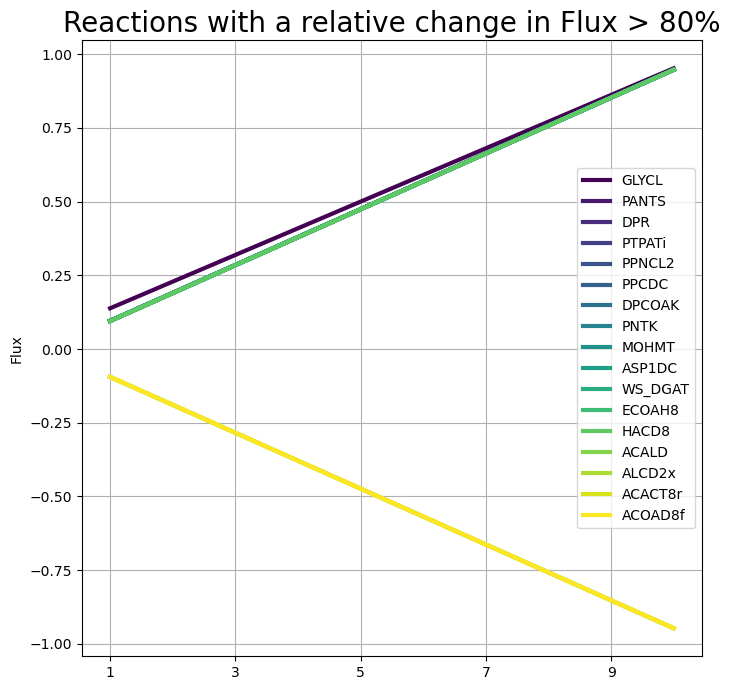

In [37]:
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 80%', size=20)

In the above figure, 3 lines are shown, whereas the number of reactions are 17. This indicates that some of the reactions have the same relative change of flux and are likely linked in the model.

In [38]:
#lowest flux reactions
target_reactions_df.tail()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
HACD8,0.09471,0.18942,0.284131,0.378841,0.473551,0.568261,0.662972,0.757682,0.852392,0.947102,1.9
ACALD,-0.09471,-0.18942,-0.284131,-0.378841,-0.473551,-0.568261,-0.662972,-0.757682,-0.852392,-0.947102,1.9
ALCD2x,-0.09471,-0.18942,-0.284131,-0.378841,-0.473551,-0.568261,-0.662972,-0.757682,-0.852392,-0.947102,1.9
ACACT8r,-0.09471,-0.18942,-0.284131,-0.378841,-0.473551,-0.568261,-0.662972,-0.757682,-0.852392,-0.947102,1.9
ACOAD8f,-0.09471,-0.18942,-0.284131,-0.378841,-0.473551,-0.568261,-0.662972,-0.757682,-0.852392,-0.947102,1.9


In [39]:
#highest flux reactions
target_reactions_df.head()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
GLYCL,0.137978,0.228415,0.318853,0.40929,0.499727,0.590164,0.680602,0.771039,0.861476,0.951913,1.855052
PANTS,0.095248,0.189905,0.284562,0.37922,0.473877,0.568534,0.663191,0.757848,0.852505,0.947162,1.899439
DPR,0.095248,0.189905,0.284562,0.37922,0.473877,0.568534,0.663191,0.757848,0.852505,0.947162,1.899439
PTPATi,0.095248,0.189905,0.284562,0.37922,0.473877,0.568534,0.663191,0.757848,0.852505,0.947162,1.899439
PPNCL2,0.095248,0.189905,0.284562,0.37922,0.473877,0.568534,0.663191,0.757848,0.852505,0.947162,1.899439


Top 10 reactions target for up- down-regulation: <br>
**HACD8 :** 3-hydroxyacyl-CoA dehydrogenase (3-oxooctadecanoyl-CoA), peroxisomal <br>
Involved in fatty acid metabolic processes. <br>
**ACALD :** Acetaldehyde dehydrogenase (acetylating) <br>
Convertion of acetaldehyde to Acetyl-CoA.<br>
**ALCD2x :** Alcohol dehydrogenase (ethanol)<br>
Convertion of alcohol to acetaldehyde. <br>
**ACACT8r :** Acetyl-CoA acyltransferase (hexadecanoyl-CoA), (r)<br>
Convertion of Coenzyme A to Acetyl-CoA.<br>
**ACOAD8f :** Acyl-CoA dehydrogenase (octadecanoyl-CoA)<br>
Convertion of Stearoyl-CoA.<br>
**GLYCL :** Glycine Cleavage System<br>
Breakdown of glycine. <br>
**PANTS :** Pantothenate synthase<br>
Catalyses the ATP-dependent condensation of D-pantoate and β-alanine to form pantothenate.<br>
**DPR :** 2-dehydropantoate 2-reductase<br>
Catalyzes the NADPH-dependent reduction of ketopantoate to pantoate.<br>
**PTPATi :** Pantetheine-phosphate adenylyltransferase<br>
Catalyzes the penultimate step in coenzyme A (CoA)<br>
**PPNCL2 :** Phosphopantothenate-cysteine ligase<br>
Formation of carbon-nitrogen bonds as acid-D-amino-acid ligases<br>

In [28]:
model.reactions.PPNCL2

Reaction identifier,PPNCL2
Name,Phosphopantothenate-cysteine ligase
Memory address,0x15f2b6050
Stoichiometry,4ppan_c + ctp_c + cys__L_c --> 4ppcys_c + cmp_c + h_c + ppi_c D-4'-Phosphopantothenate + CTP C9H12N3O14P3 + L-Cysteine --> N-((R)-4-Phosphopantothenoyl)-L-cysteine + CMP C9H12N3O8P + H+ + Diphosphate
GPR,b3639
Lower bound,0.0
Upper bound,1000.0
